## Predictive Analytics using Logistic Regression

In [1]:
from google.colab import files
uploaded = files.upload()

Saving student-scores.csv to student-scores.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv("student-scores.csv")

## Step 1: Prepare Data

In [3]:
X = df[[
    "absence_days", "weekly_self_study_hours",
    "math_score", "history_score", "physics_score",
    "chemistry_score", "biology_score",
    "english_score", "geography_score"
]]

# Target (predict gender)
y = df["gender"]

# Encode categorical target into numeric (Male=0, Female=1)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 2: Train Logistic Regression Model


In [4]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Step 3: Predictions & Evaluation


Model Accuracy: 0.517

--- Classification Report ---
              precision    recall  f1-score   support

      female       0.52      0.47      0.49       200
        male       0.52      0.56      0.54       200

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400


--- Confusion Matrix ---
[[ 94 106]
 [ 87 113]]


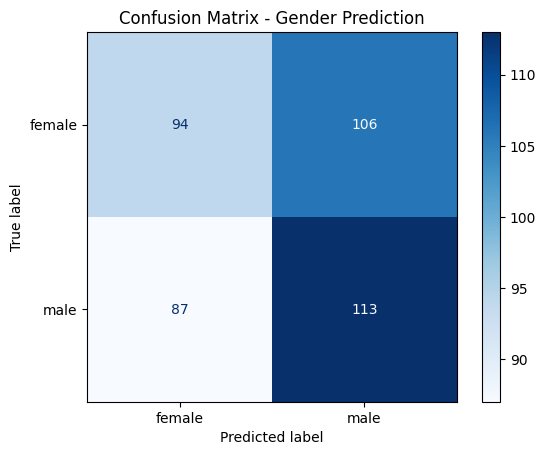

In [5]:
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", round(accuracy, 3))

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Gender Prediction")
plt.show()